# Understanding Customer Satisfaction - Technical Report - Team 4

**Team 4**

Anastasia Yaneva

Evgeniya Tasheva

Rayna Pavlova

# 1. Data Preprocessing

##**A quick summary of the data available**

The initial datastet before the Cleaning of the data is 'online_transactions.sqlite' containing 11 tables with
57 different columns and a total of 118143 rows.

Total number of (non-empty, distinct) key categories:
* Orders = 99441 ('order_id')
* Payments = 99440 ('order_id' in 'olist_payments')
* Reviews = 98410 ('review_score')
* Customers = 96096 ('customer_unique_id')
* Sellers = 3095 ('seller_id')
* Products = 32951 ('product_id')
* Product_categories = 71 ('product_category_name')
* Customer cities = 4119 ('customer_city')
* Seller cities = 611 ('seller_city')

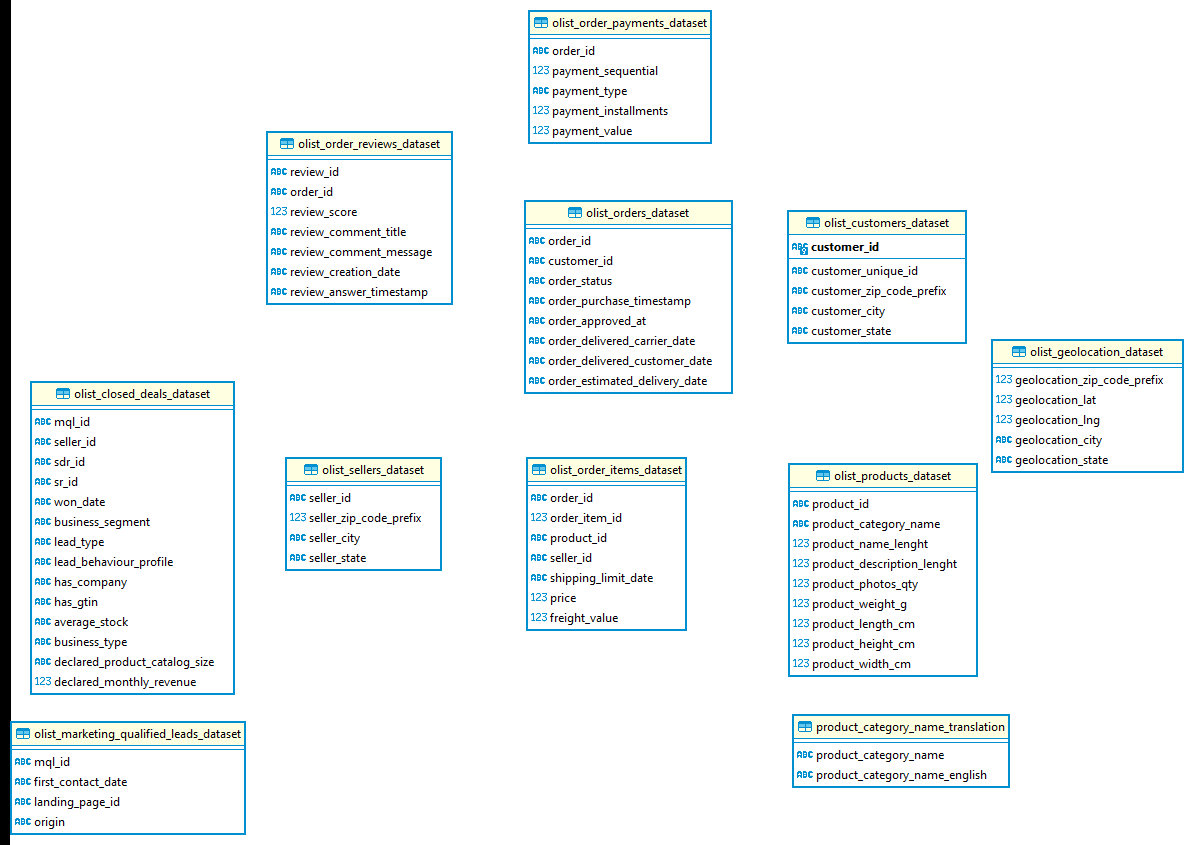

----

##**How have you pre-processed the data and why?**

1. **Initial data exploration** using SQL / DBeaver
2. **Denormalization:** We merged all tables, resulting in one large table.
3. **Data cleanup using pandas:**
**n/a values:** Check the number of n/a values in all columns and remove or replace missing values, where it is necessery.

**Review score data**:

* We kept all records of orders with non-empty 'review_score' and dropped 961 orders without review scores, as they give no information about customer satisfaction.
* For 547 orders that have more than one review score, in a new column we calculated a single rounded **average review score** per order.

**Product category**

For 2381 orders without product category we created a **'no_category'** in order to keep them in the analysis, as they all do have review scores and half of them have negative reviews (score 1, 2 or 3).
775 orders with no category are with missing items, but we left most of thems, which are with review score.

*NB All newly added / calculated data is placed in new columns, in order to keep the original data set available at any moment it may be needed for the analysis.*

**Data types:** We checked the data types of all columns and where needed cast them into the approprite data types for analysis, most importantly all dates were converted to **date type**, so that we can work with the time dimension of the data.

4. **Further data exploration:** In pandas and DBeaver in parallel we explored the relationships between categories and checked for data quality issues.

5. **Key categories:** Finally, we selected the key categories to be used in the analysis.

They are:

* Order_id

* Review_score

* Order_purchase_timestamp

* Estimated_delivery_time

* Order_delivered_customer_date

* Product_Category -> Product_Category_name_english

* Item_id

* Customer_unique_id

* Seller_id

##**What kind of data quality issues have you found?**

* **Missing review scores** - removed 961 orders

* **Orders without payment** - just 1 order removed

* 759 orders **without products** and items were not removed, because they have review scores.

* 2381 orders have items with **no product category**

* 2843 orders with **no delivery date** were grouped and ignored when analyzing the time for delivery

* **wrong data types** for numeric and datetime values

##**What is the final dataset used to answer the questtion?**

[Link to .csv file.](https://drive.google.com/file/d/1QrVE5N1koCj-pNOuTktvAxfEsO0IUa9c/view?usp=sharing)

**A quick summary of the data available**

The final dataset after the cleaning of the data contains 1 table with 62 different columns and a total of 118143 rows.

**Total distinct number of key categories after data preprocessing:**
* Orders    = 98672
* Payments  = 98665
* Reviews   = 98409
* Customers = 95379
* Sellers   = 3091
* Products  = 32790
* Product_categories =  72
* Customer cities = 4117
* Seller cities = 612
* Customer states = 27
* Seller states  = 24

**Overview of the processed data based on a Category:**

Starting from the table containing all merged tables from the dataset we proceeded to :
1. Remove records that have missing values in the following categories:
- orders without review scores
- orders without payment

2. Replace missing values in the column "product_category_name_english_full"
with string **"no_category"** in order to keep orders where products are not assigned a specific category, but still have review scores.

3. Add new calculated columns:
- "avg_review_score" - where the review is a whole number (to handle orders having more than one review score)
- "product_category_encoded" - assigns an unique number to each category instead of text/title in order to use it in a regression
- "late" - a column that calculates the difference between the estimation date and the deliveded date
- "est_in_days" - calculated started estimation for delivery of the order from the estimation date and purchease timestamp
- "product_size_cm" - calculated 3-D size of the product from the existing mesures (in cubic centimeters).

***Output of df.info() for merged dataset***

In [ ]:
<class 'pandas.core.frame.DataFrame'> RangeIndex: 118143 entries, 0 to 118142 Data columns (total 62 columns): #
 Column                              Non-Null Count   Dtype          ---  ------                              --------------   -----
1   order_id                            118143 non-null  object
2   customer_id                         118143 non-null  object
3   order_status                        118143 non-null  object
4   order_purchase_timestamp            118143 non-null  datetime64[ns]
5   order_approved_at                   117971 non-null  object
6   order_delivered_carrier_date        116095 non-null  object
7   order_delivered_customer_date       114858 non-null  datetime64[ns]
8   order_estimated_delivery_date       118143 non-null  datetime64[ns]
9   order_item_id                       117329 non-null  float64
10  product_id                          117329 non-null  object
11  seller_id                           117329 non-null  object
12  shipping_limit_date                 117329 non-null  object
13  price                               117329 non-null  float64
14  freight_value                       117329 non-null  float64
15  review_id                           118143 non-null  object
16  review_score                        118143 non-null  float64
17  review_comment_title                13987 non-null   object
18  review_comment_message              50211 non-null   object
19  review_creation_date                118143 non-null  object
20  review_answer_timestamp             118143 non-null  object
21  avg_review-score                    118143 non-null  float64
22  product_category_name               115634 non-null  object
23  product_name_lenght                 115634 non-null  float64
24  product_description_lenght          115634 non-null  float64
25  product_photos_qty                  115634 non-null  float64
26  product_weight_g                    117309 non-null  float64
27  product_length_cm                   117309 non-null  float64
28  product_height_cm                   117309 non-null  float64
29  product_width_cm                    117309 non-null  float64
30  product_category_name_english       115609 non-null  object
31  product_category_name_english_full  118143 non-null  object
32  payment_sequential                  118143 non-null  int64
33  payment_type                        118143 non-null  object
34  payment_installments                118143 non-null  int64
35  payment_value                       118143 non-null  float64
36  seller_zip_code_prefix              117329 non-null  float64
37  seller_city                         117329 non-null  object
38  seller_state                        117329 non-null  object
39  customer_unique_id                  118143 non-null  object
40  customer_zip_code_prefix            118143 non-null  int64
41  customer_city                       118143 non-null  object
42  customer_state                      118143 non-null  object
43  mql_id                              5244 non-null    object
44  sdr_id                              5244 non-null    object
45  sr_id                               5244 non-null    object
46  won_date                            5244 non-null    object
47  business_segment                    5244 non-null    object
48  lead_type                           5189 non-null    object
49  lead_behaviour_profile              3435 non-null    object
50  has_company                         30 non-null      object
51  has_gtin                            30 non-null      object
52  average_stock                       30 non-null      object
53  business_type                       5239 non-null    object
54  declared_product_catalog_size       0 non-null       float64
55  declared_monthly_revenue            5244 non-null    float64
56  first_contact_date                  5244 non-null    object
57  landing_page_id                     5244 non-null    object
58  origin                              5232 non-null    object
59  late                                118143 non-null  float64
60  product_size_cm                     118143 non-null  float64
61  product_category_encoded            118143 non-null  int64
62  est_in_days                         118143 non-null  int64
dtypes: datetime64(3), float64(18), int64(7)

# 2. Methodology

##**What approach did you use to answer the question?**

1. *Data Exploration in Pandas and DBeaver* in parallel, looking for relationships between key categories and check for data quality issues
Select the key categories to be used in the analysis.

2. *SQL queries* for analysing the data in more detail before the main processing, in order to collect some ideas and potentially interesting facts.

3. *Line and Multiple regression* to find the charactesristics which influence customer reviews in the dataset to the highest degree.

4. *Time Series analysis* to see if there is some interesting period for the orders and other key categories.

5. *Unsupervised machine learnig* to group the orders by the most significant charachterestics and see whether some of their customer reviews are in any way different.

6. *Power BI* in order to visually represent the data we analysied, adding new measures and columns in the app.

7. (Unsuccessful attempts) In order to get some direct customer opinions, we wanted to group the review messages of the customer by key phrases, even though not all orders have review messages (a total count of 50211).
We ran the reviews dataset by google's Gemini AI to get translations of most commonly mentioned words and phrases in review titles and review message text. Output here: [link text](https://docs.google.com/spreadsheets/d/1A45BmTcSt5iSp2UVLZI7Id6VIbqMwi_2WP0KrGm-ceI/edit?usp=sharing).

In another attempt to get to the meaining of customers' comments, we used a language sentiment analysis module (vaderSentiment) to get information about the overall meaning of messages and titles for customer comments with review score 3. However, we view the results with a high degree of doubt and proceeded to make the assumption that review score of 3, just like 1 and 2 means a non-satisfied customer, as this appears to be the typical approach in business analysis.

##**What assumptions did you make? State them explicitly.**

During the phase of analyzing the data and before the cleanup we already had some basic assumptions:

* Review score in focus

The clearest most obvious measure for the customer satisfaction is the review score. Just a small amount of orders have no review, so it is ok to ignore them in the analysis. Satisfied customers gave review scores 4 or 5, while review scores of 1,2 and 3 were interpreted as dissatisfied.

* Customer messages

There is a direct opinion from the customer in the customer messages. Unfortunately just about 35% of the orders have messages, and they are hard to group. We decided not to drop this direct sample of customer opinion, but instead to try and use AI app for translation that would help divide them in groups. As described above, the attempt was not convincing.

* Towns vs. states

In the sql analysis, trying to group the orders by customers and seller towns, we found that orders are not concentrated in specific towns and groups would be too small to be analyzed. Therefore we decided to examnine the states, as they could allow more realistic groups. The location of the customer and the seller do not seem to influence the review score. A big group of the sellers are situated in SP state and they deliver in different states.

* Product and product categories

As we see from sql reports, products do not have names, but are associated with product categories, which are a good way to divide and analyze them. The product category is significant for customer satisfaction.

* Size of products

As we see the dimensions of the products, we decided to try to calculate the volume of a product (in cubic centimeters) and use it. The size, weight and the value of products, however, do not seem to influence customer satisfaction, neither do the price and the mode of payment.
        
* Marketing activities

As we discussed and saw in the data exploration phase, marketing activities exist, but the dataset contains only a very small number of sellers from the total. The period of available data from the marketing initiative is too short to find and add many new sellers, so the orders from new sellers are too few to be analyesed. Maybe in future it will be an interesting dataset, but for now it is too small to analyze. For that reason we did not look further into seller profiles, as only a very small subset of sellers actually provided data about their businesses.

# 3. Results


##**What did you find as main drivers of customer satisfaction?**

Our answer to the question 'What drives customer satisfaction?' is the result of a re-iterative process of asking ourselves a series of questions and  probing into the data to confirm or reject our theoretical guesses.
Is it the price ? Is it the distance  ? Is it the fast delivery?

We examined our key categories in detail before deciding which variables make sense for further statistical analysis and visualisation of results. We found two key factors that significantly influence customer satisfaction: delivery time and product category.

### Detailed overview of the processed data based on Category

####**Sellers**

We have 2 business types in the database, but the majority of the sellers is not categorised and we have no data of the seller. Out of 3091 unique seller id’s, 2714 sellers are not classified, 287 sellers are classified as resellers and a minority of 90 sellers are manufacturers. We also have 29 business segments, but the bigger part of the sellers are not classified: 2711 sellers are without business segment, and only 380 sellers are classified. The majority of the classified sellers are in the following business segments:  health and beauty – 45 sellers, home décor – 44 sellers, household utilities – 44 sellers, construction tools and house and garden – 32 sellers, audio and video electronics – 31 sellers etc.
Regarding the geographical location,  the majority of the sellers were based in one particular region SP (1846), followed by PR (347), MG (244), SC (190), RJ (171), RS (129) etc.
From this data we can conclude that for the majority of the time the type of seller was not categorised in the platform, so any further analysis of the seller will have insufficient data of its business and the problematics which could occur due to the lack of information in the database.

*Sellers by segment type*

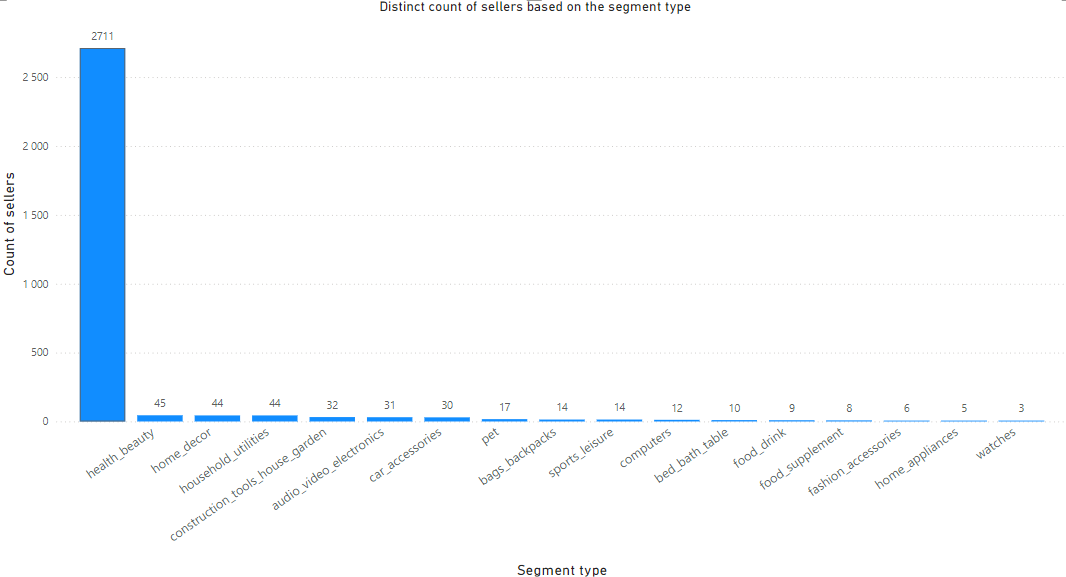

A representation of the distribution of sellers and customers by state.

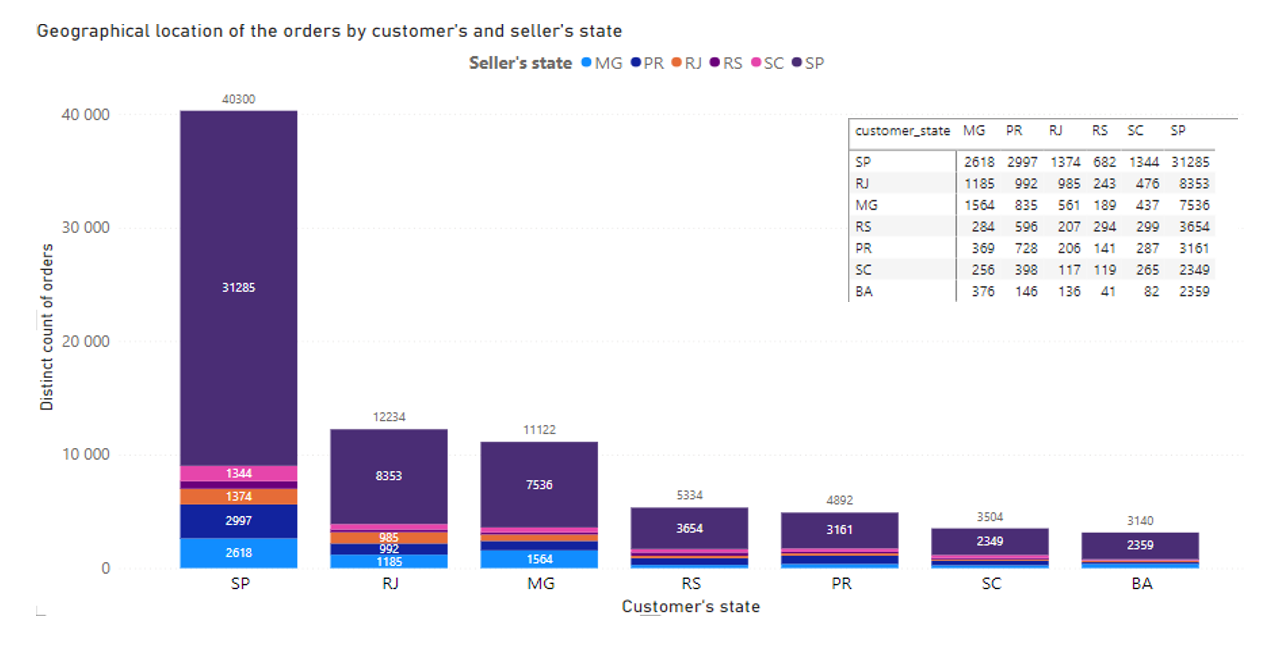

####**Products**

After cleaning the database there are 32790 products.  Based on the weight in grams there are more lighter products than heavy. Over 20 000 products are under 1 kg. Over 8 000 products have a weight between 1kg and 5 kg. 2200 products have a weight between 5kg and 10kg. Only 1891 products have a weight between 10kg and 50 kg.
Base on the height of the products we also have more smaller objects than taller:
More than 24 600 products have a height between 1 and 20 sm. Over 7000 objects are between 21 sm and 50 sm. Only over 1000 products have a height over 50 sm.

Looking at product information in the dataset, we discovered that 610 products do not have any photo.  The majority of the products have 1 photo (16489). Over 6000 products have 2 photos and more than 9 000 products have 3 or more photos.

Based on the description of the product that we have analysed, there were 610 products that did not have a description. Only a small part of the products had a description under 500 symbols – around 35% of the products. The rest  of the products had a description over 500 symbols.

Based on the category, the top 6 categories (bed bath and table, sport and leisure, furniture and décor, health and beauty, houseware, auto) contain 13 262 products which is more than 40% of the total product id's. The rest of the categories on the platform (65) contain 18 909 products. For 619 ordered products there was no category found, so we have created the label “no_category” in order to keep them in the data set and analyse them, as they have review scores.
Based on the price, the majority of the products had a price under 100 reals – 20 066 products. The price over 100 reals  is found in 12724 products.

*Sales amount by product category*

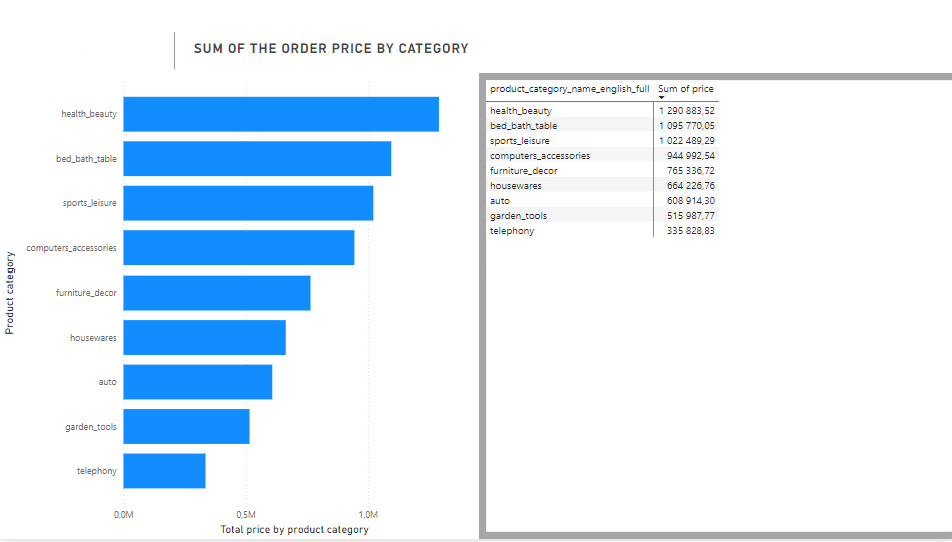

*Average product weight by category*

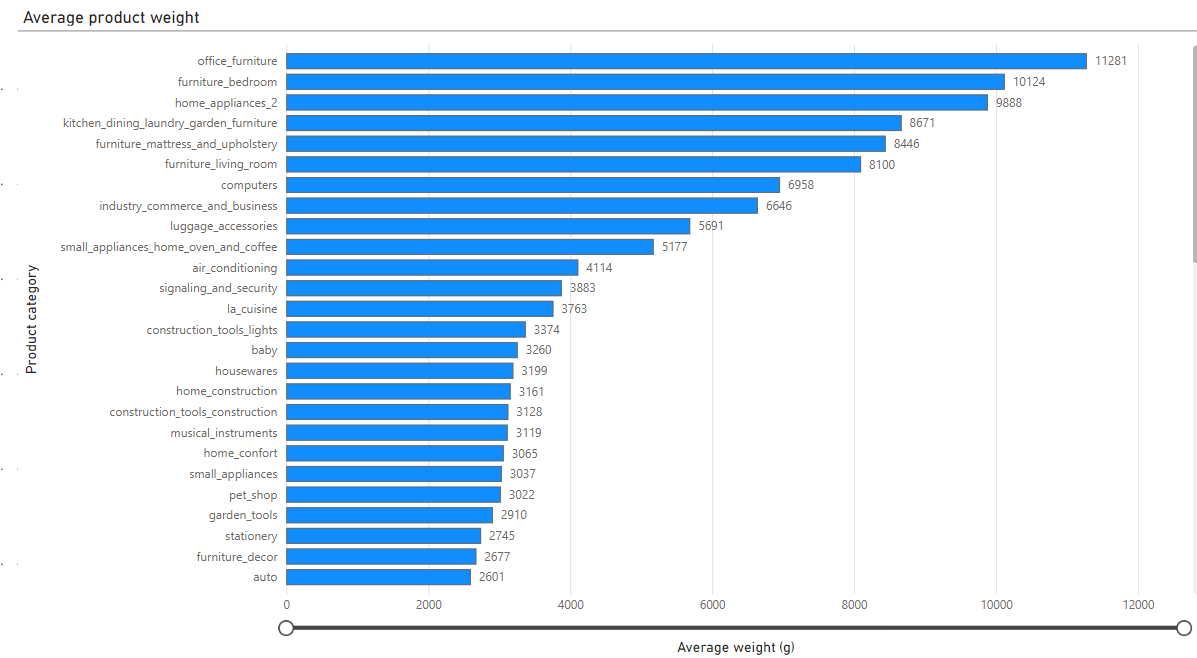

####**Orders**

After cleaning the data there were a total of 98672 distinct orders, of which 98665 were paid.
The majority of the orders were payed by credit card : 75910 orders, followed by boleto with 19636 orders. In third place are the orders payed by voucher, 3829, followed by 1521 orders payed by debit card.

Almost 50% of the orders (48220) have a payment value of up to 100 reals,  46612 orders cost between 101 and 500, and only 3840 have a payment value amount of over 500 reals.

The overall customer satisfaction level is high.

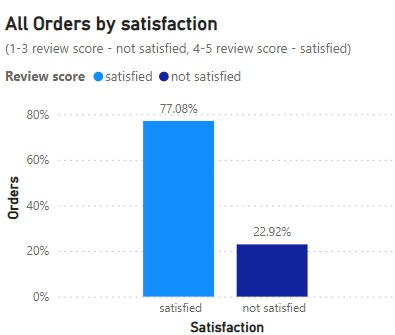

Orders with more than one items tend to get a higher share of dissatisfied reviews than the average for the total dataset.

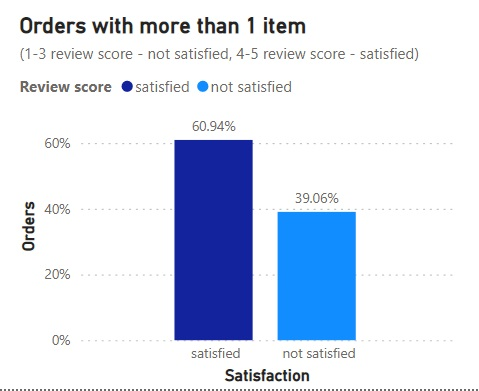

Delivered orders get a predominantly satisfied response, however, the relatively small share of non-delivered orders (cancelled, shipped, unavailbe) get predominantly dissatisfied reviews.

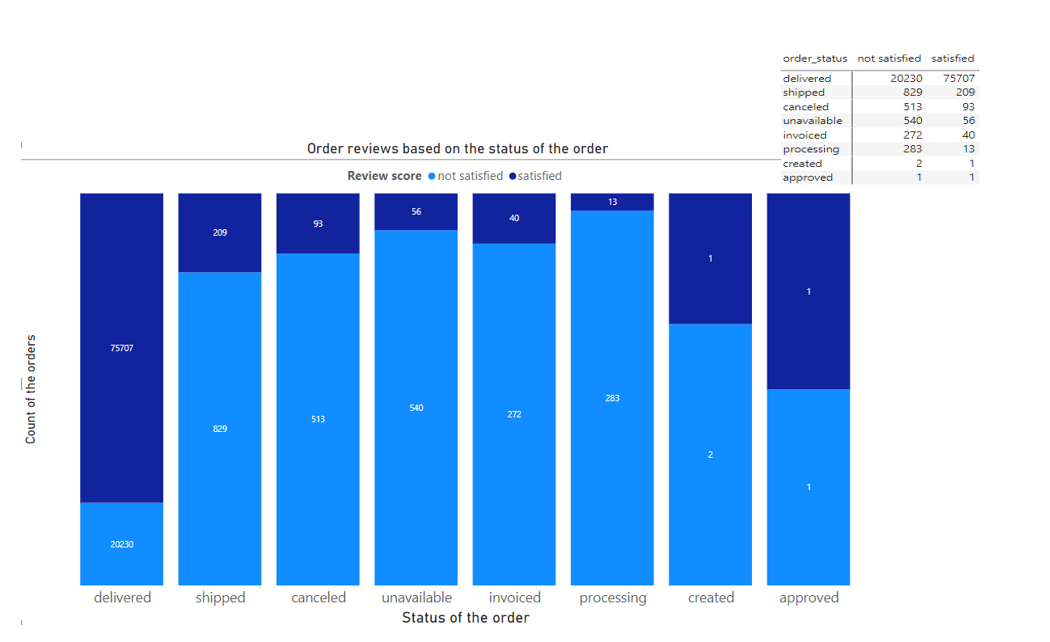

Payments are predominantly done by credit card but show not great variation in review score per payment type.

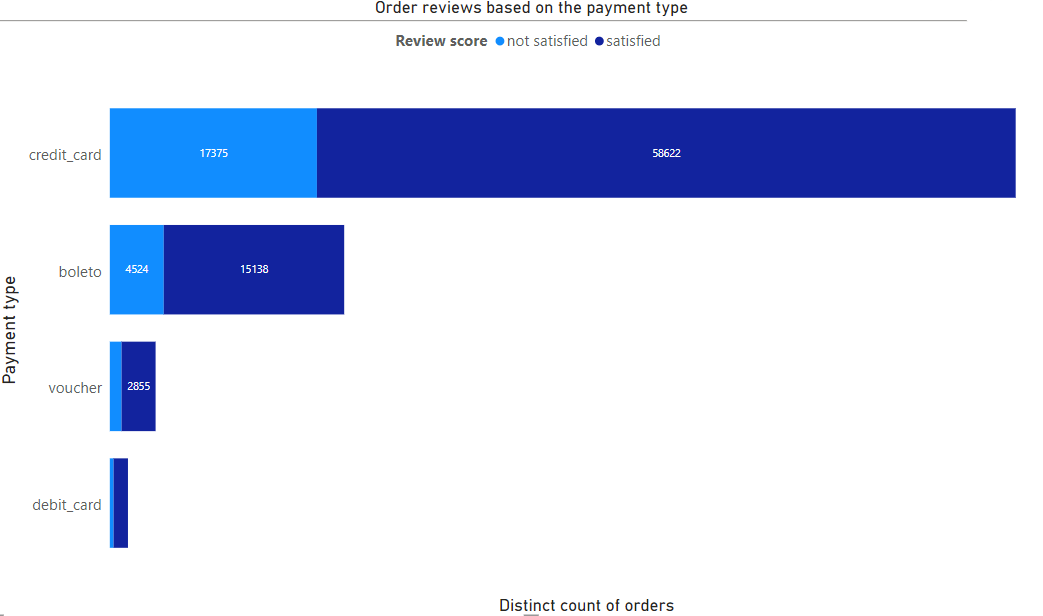

####**Customers**

The total  number of distinct customer id’s is 98 672.  Almost the half of the customers are  from the state of SP : 41 471, followed by  the state RJ with 12 687 customer id’s. In the third place is the state of MG with 11 554 customer id’s. The forth and 5th position are taken by the states RS and PR with 5443 and 5019 customer id’s.
The rest of the customer id’s, 22 498 in total, is found in other 22 states (SC,BA,DF,GO,ES,PE,CE,PA,MT,MA,MS,PB,PI,RN,AL,SE,TO,RO,AM,AC,AP,RR).

Regarding the reviews that were left by the customers, the majority of the customers left a positive review : 57 076 customers gave a review score of 5, followed by 19 098 customers review scores of 4. In the third place we see that the negative reviews begin to predominate with 11 392 customers leaving a review score of 1. The more neutral review score 3 is submitted by 8 160 customers, and in the last place we see 3 148 users leaving a review score of

In conclusion, the majority of customers are very satisfied, while a minority is extremely dissatisfied with their orders. In the analysis bellow we will try to contemplate on the possible reasons for negative reviews by focusing on the customers who gave review scores between 1 and 3.


Returning customers (customers with more than one order) tend to be slightly more dissatisfied than one-time customers.

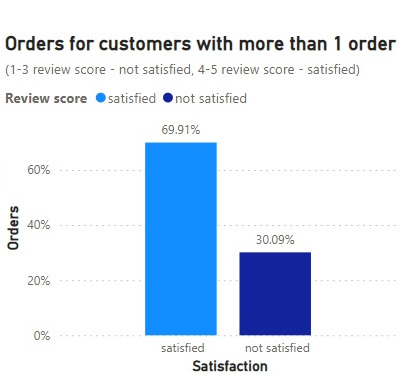

The state location of the customers doesn't seem to affect their satisfaction level. Orders made from the states of RJ (Rio de Janeiro) and BA (Bahia) have a slightly higher level of dissatisfaction than average. A closer look at the data shows that deliveries to those states took generally longer, which could be a reason for lower review scores.

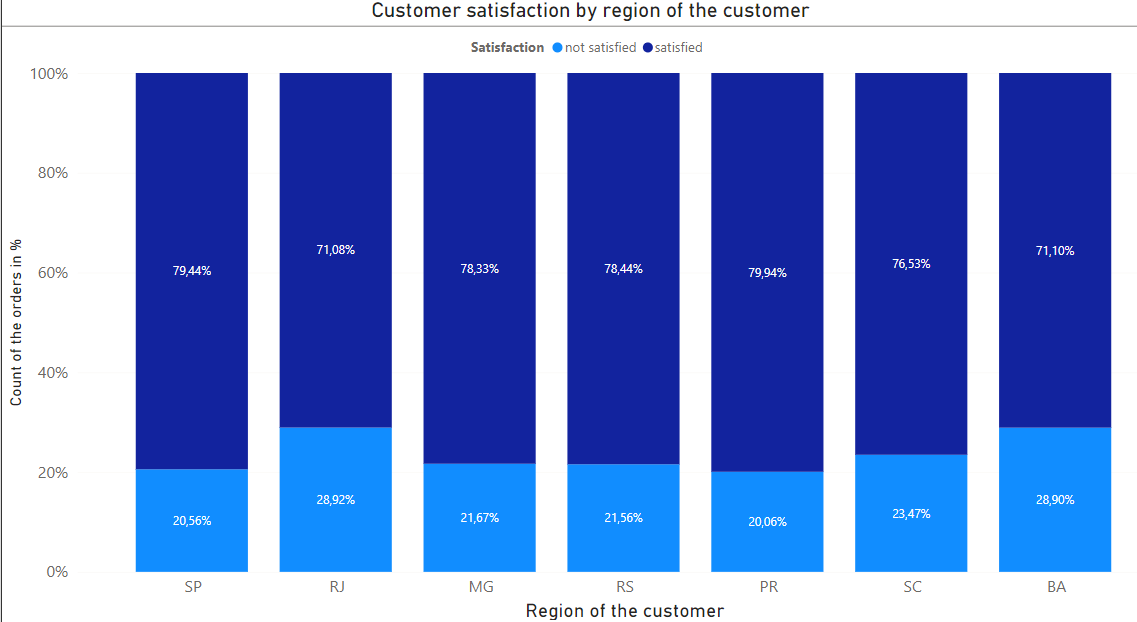

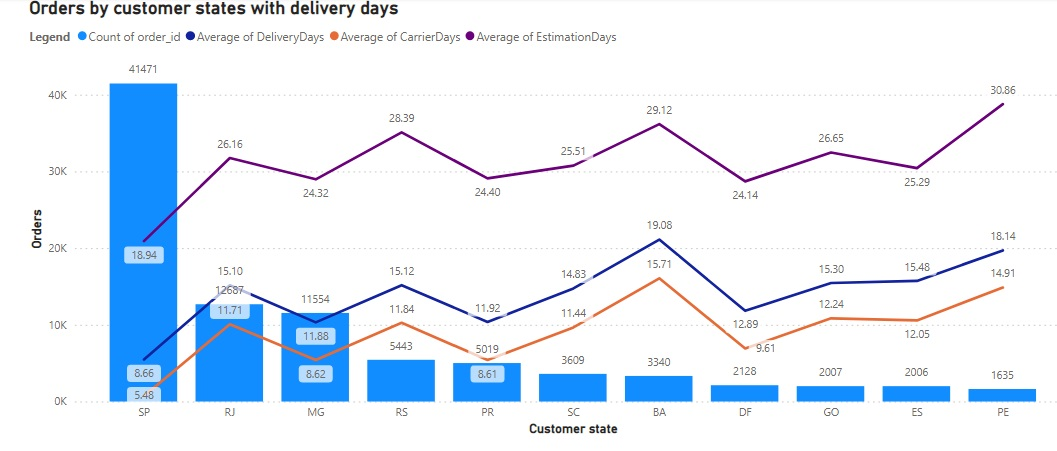

####**Delivery days**

The main important and sensitive for the customer thing is **the delivery period** or **delay**. As we have a few date values of the orders, we chose to calculate the delivery days and the delay in days, so we could have a good time measure for the analytical work.
We noticed that the time estimated for delivering the products is really long for some orders and far from the actual delivery date not precise.
The time for delivery is shorter in most of the orders just because of not precise estimation time. The actually late orders (delivered after estimated date) are not many, however, we still have negative reviews for the orders that arrived on time or before estiamted delivery time.

Orders with actual delay compared to the estiamted delivery date get predominantly dissatisfied customer reviews.

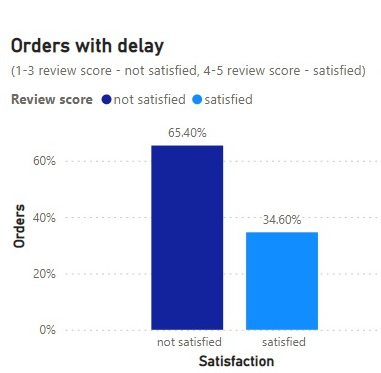

####**Review scores, titles, messages**

We noticed that customers tend to attach messages to their review scores more often when they are dissatisfied than when satisfied. The distribution is shown in the following graph. Over one-third (36,7%) of orders have review messages (a count of 36276 ), their distribution is represented in the graph below.


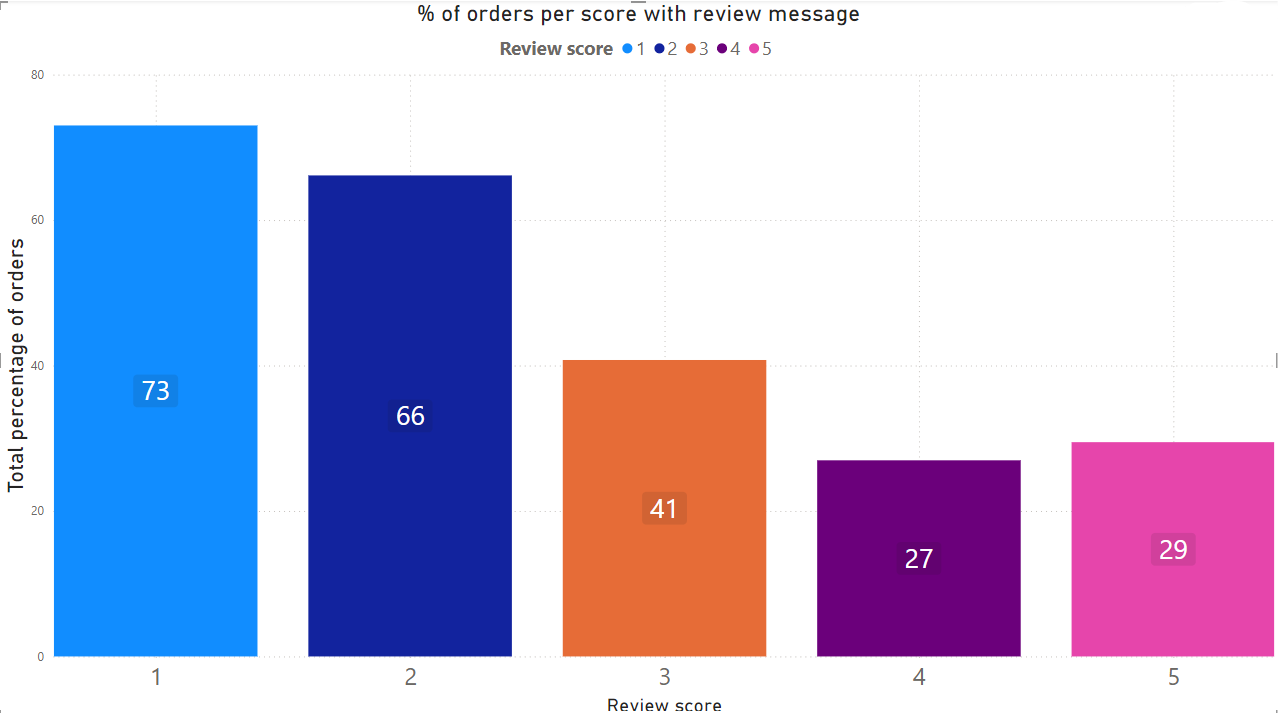

### **Time for delivery**


The olist dataset features several relevant data series:
- order placed timestamp
- order approved
- shipment limit date
- delivery date carrier
- delivery date customer

All along these steps delay could occur, so we examined them in more detail.

####**Late deliveries**

Comparing the estimated delivery time with the actual customer delivery date resulted in 7661 orders delivered late (after the estimated date). For these the distribution of review scores is roughly 35:65 satisfied / not-satisfied (the first being 5 and 4 scores, the latter 2 and 1, while 3, being neutral, is divided evenly between the previous two categories.).

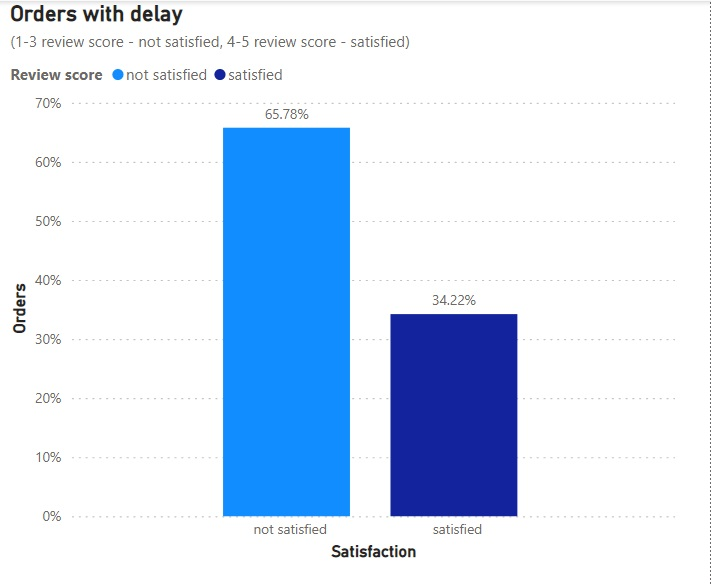

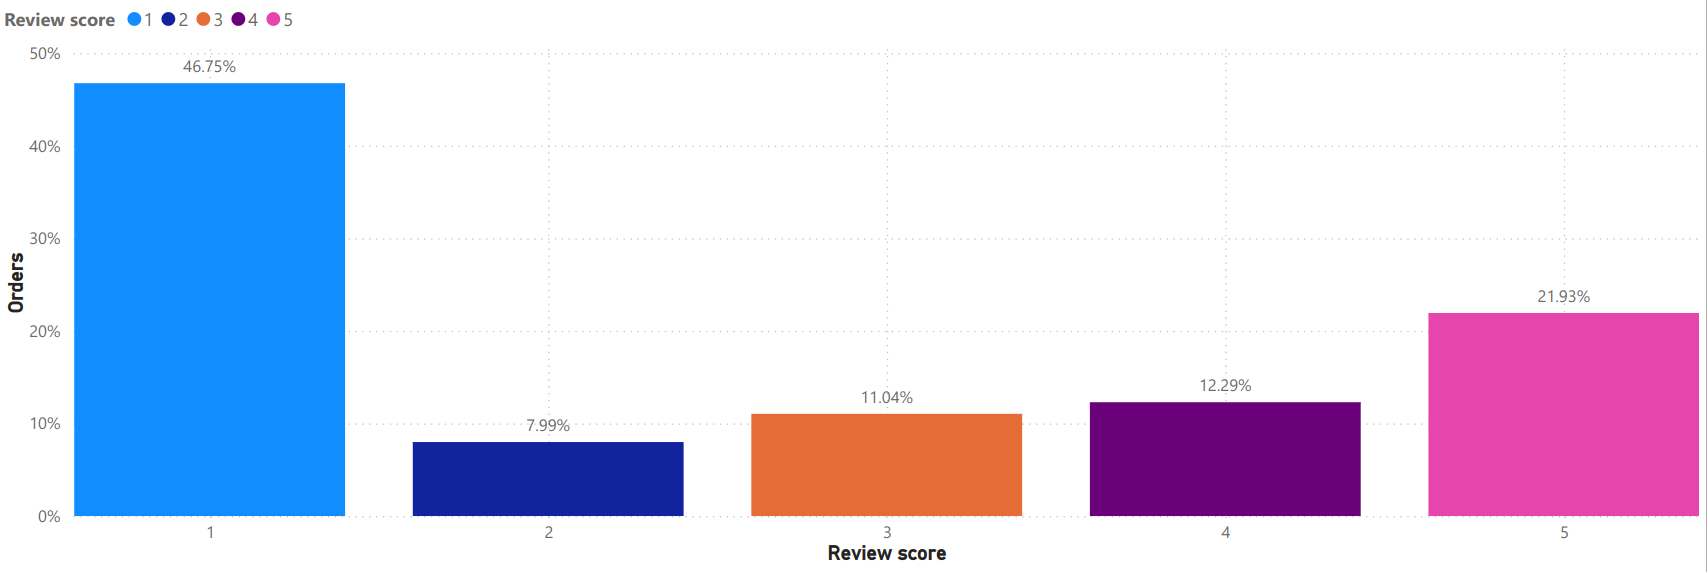

**Late deliveries by product category**

Positive numbers indicate early delivery (before estimated date), while negative numbers indicate late delivery (after estimated date). Products from the perfumery, electronics, stationery, bed_bath_table, cool_stuff, auto, health_beauty categories have the longest delay in delivery.

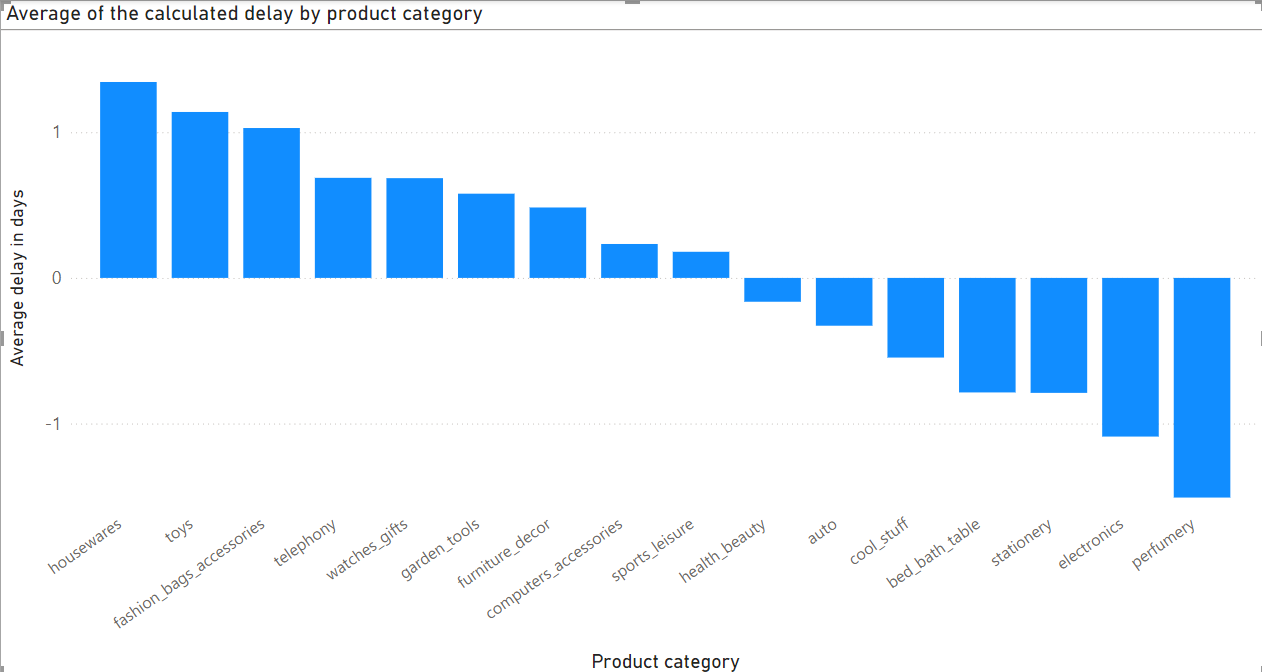

###**Product**

Our analysis shows that from all categorical data, product category has the most significant influence on customer satisfaction.
Product quality is obviously related to customer reviews.  However, lacking specific product names by product_id, we have to work with the 'product_category_name' in the analysis. Below are the main results of some (not all) our attempts to link various other product features, e.g. product size (in cubic centimeters), product photos, product description or product weight, price, freight value, payment value, to review scores.

###Stastistical analysis

####**Linear regression: Actual vs. Estimated delivery days**

1) Difference to estimated delivery date
A key factor we wanted to explore is **the difference in days between the actual date of delivery to the customer and the estimated date of delivery**.
days_until_est_delivery = (x['order_estimated_delivery_date'] - x['order_delivered_customer_date'] ).dt.days.mean()

For the purposes of this regression we excluded 2843 orders that had no "delivered_customer_date".

For 547 orders with more than one review score we created a new column, "avg-review-score", of the rounded down average of the multiple scores per order, so that we have just whole numbers in the set.

The mean tendency of the data shows that the earlier the delivery date is from the estimated date, the review score is higher and vice versa, the closer to the estimate the delivery is (even when still delivered on time), the lower the score is.

R-squared: 0.916
Calculated correlation is 95% - the more days before the estimation date, the higher the review score is.

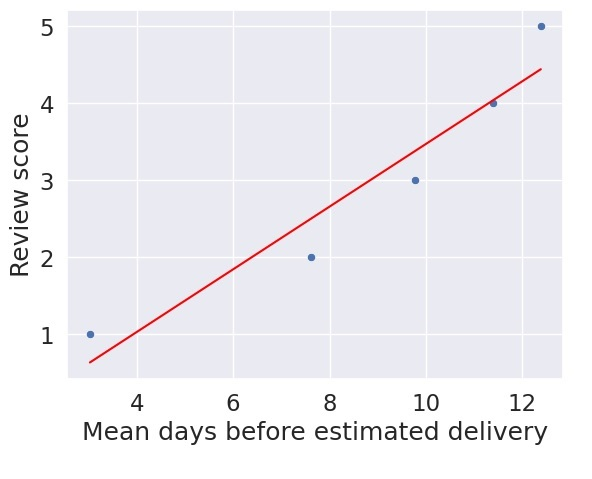

####**Linear regression: Carrier delivery days vs. review score**

carrier_delivery_days = (x['order_delivered_customer_date'] - x['order_delivered_carrier_date'] ).dt.days.mean()Days

The orders without 'delivered_customer_date' and 'order_delivered_carrier_date' are dropped for this analysis, so that we work with the orders which are delivered.
As in the linear regressions above we use just whole review score values calculated in the set from 'avg-review-score' column.
The mean tendency of the data is clear – **the review score goes down as the number if days the carrier takes for delivery increases**.

R-squared: 0.942
Calculated correlation is 97%.


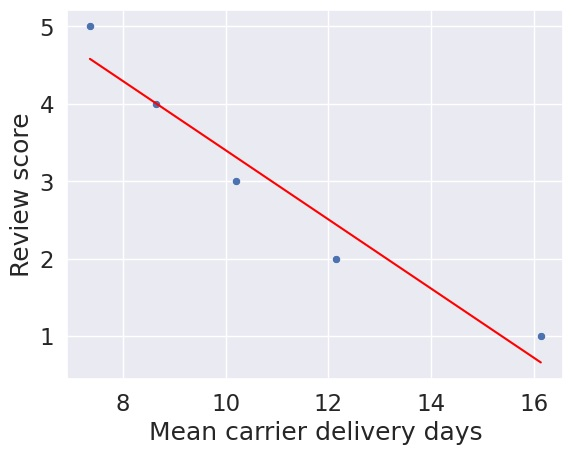

Regression of the satisfaction also gives us a good result, so at the end we could say that **every additional day the carrier takes to deliver to customer decreases customer satisfaction**.

####**Linear regression: Carrier delivery days vs. Custimer satisfaction**

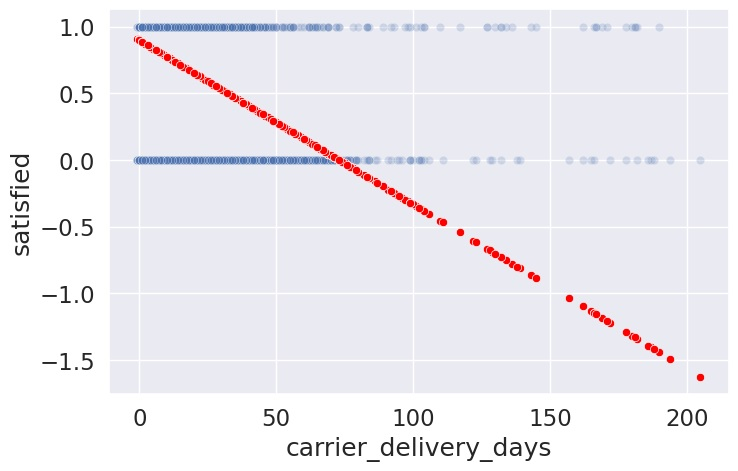

####**Logistics regression: Carrier delivery days vs. Customer satisfaction**

The logistics regression confirms the above thesis as well.

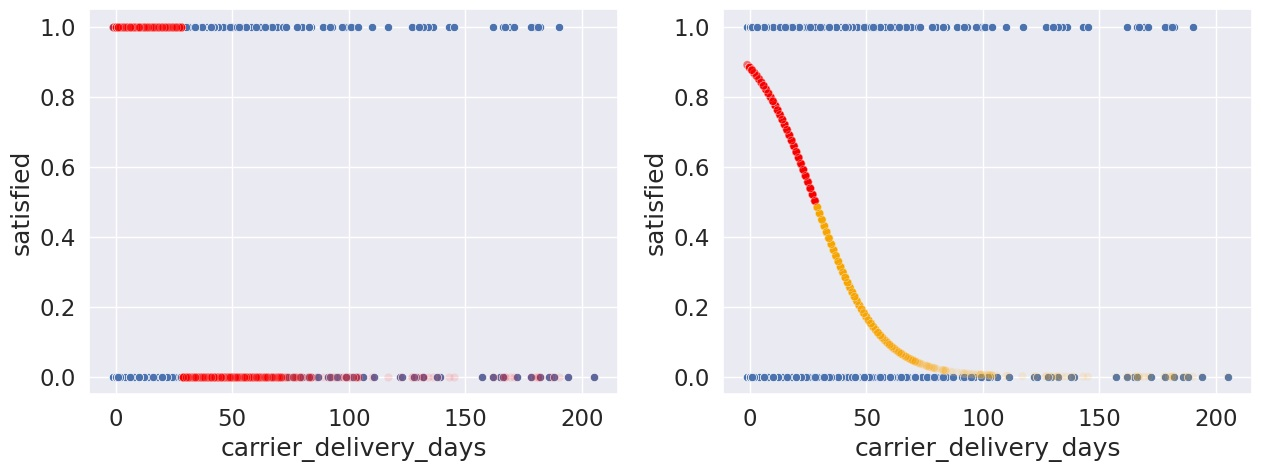

As a result we conclude that the **order review score is closely connected with the carrier time for delivery**, as it is connected with the estimation and the days taken for delivery to customer.

####**Logistic regression: Estimated delivery vs. Customer satisfaction**

**Regression of the satisfaction** also gives us a stasistically significant result, which confirms that every day earlier than the estimated date could make the customer more satisfied. On other hand most of the orders, are delivered before the estimation. If we check the review for the orders which are delivered with real delay or after the estimated date, we could see that 50% of them are not satisfied customers.

**As a result we could conclude that the order review is tightly connected with the delivery days and especially with the days from the day of delivery to the day of estimation.**

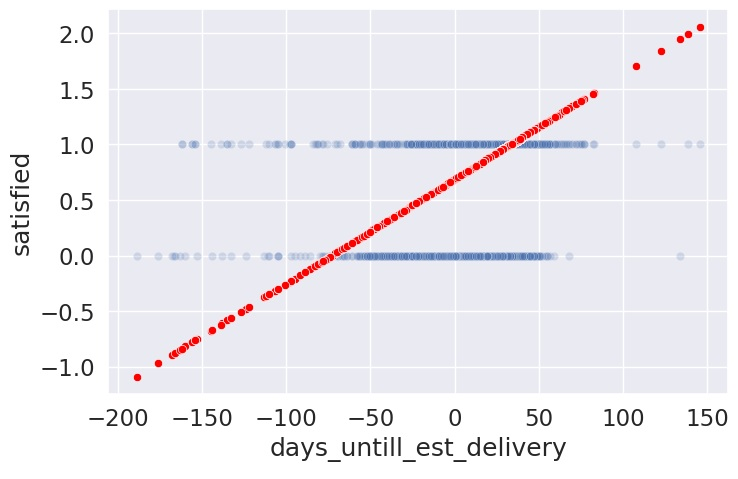


####**Scatter plot: Review score vs. Payment value**


The scatter plot analysis the relationship between the **review score** and two different measures of payment value: **mean payment value** (left plot) and **median payment value** (right plot).

From the result, we can see that there is **a noticeable negative trend between the mean payment value and the review score, where higher mean payment values corresponds to lower review scores**.

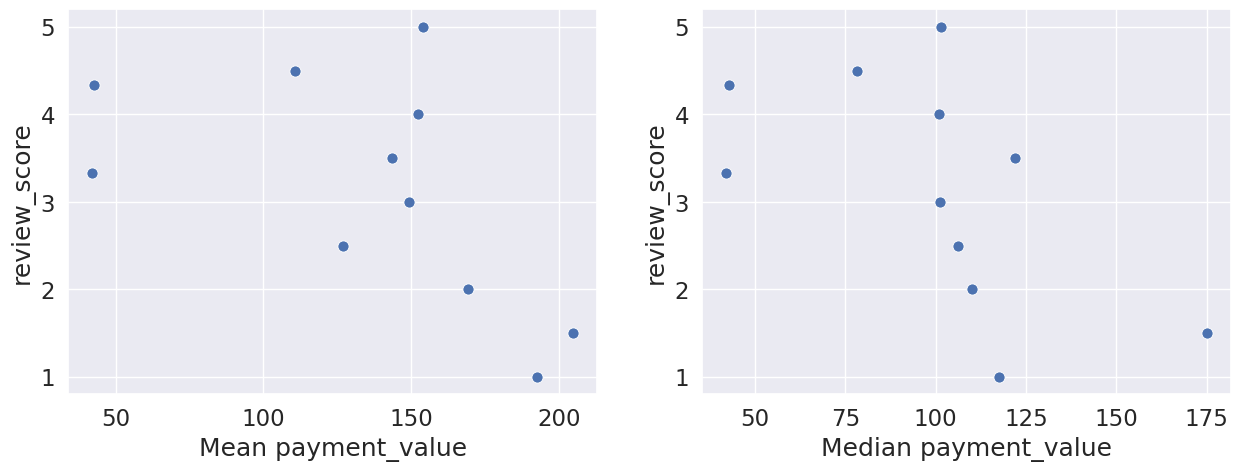


####**Linear regression: Freight value vs. Review score**

A linear regression was made in order to identify if we have any relation between the price of the freight and it showed that indeed there were no relation between the both of them : the R-squared (0.001) is very low, indicating that only 0.1% of the variability in the review score is explained by the freight value. This suggests that the linear model does not explain much of the variance in the review scores.

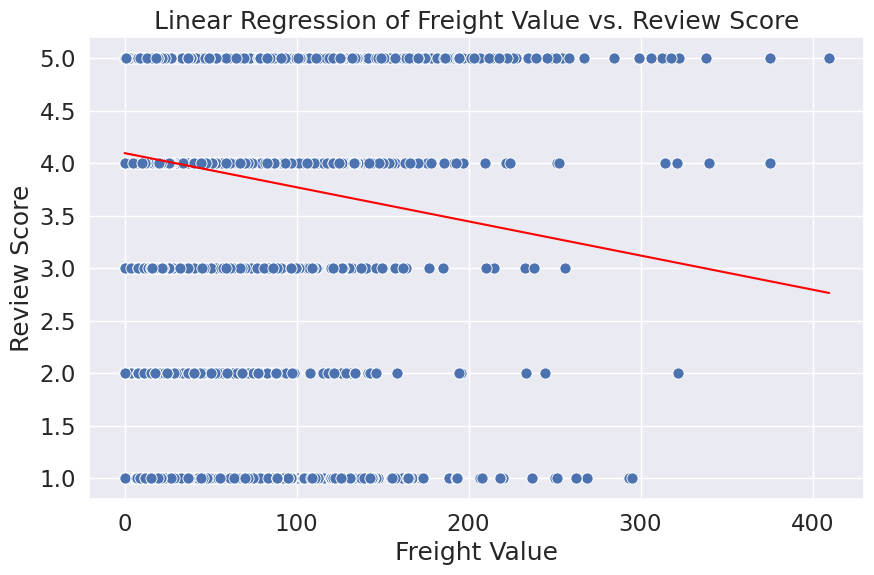



####**Linear regression: Payment value vs. Review score:**


A linear regression was made in order to identify if we have any relation between the payment value and review score, and it showed that although it had a better correlation than the freigth value, it still did not have a significant importance.
The model showed a moderate amount of variance in review scores (R-squared = 0.311).

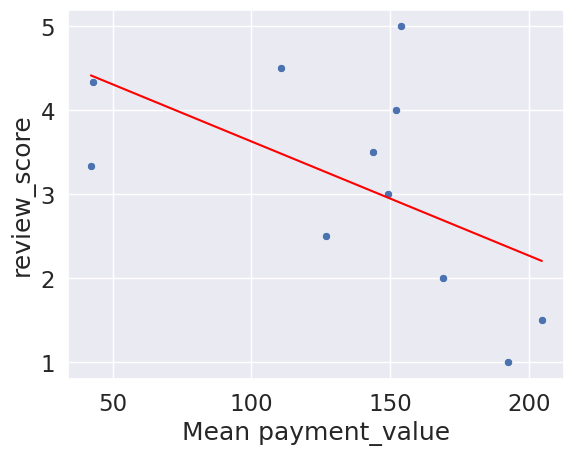

####**Logistics regression: Price vs. Customers satisfation**


The analysis shows us that the probability that the customer is content with its order if the payment value is lower has no statistically significant result. There is a tendency that lower price value is linked to customer satisfaction but the result are not decisive.

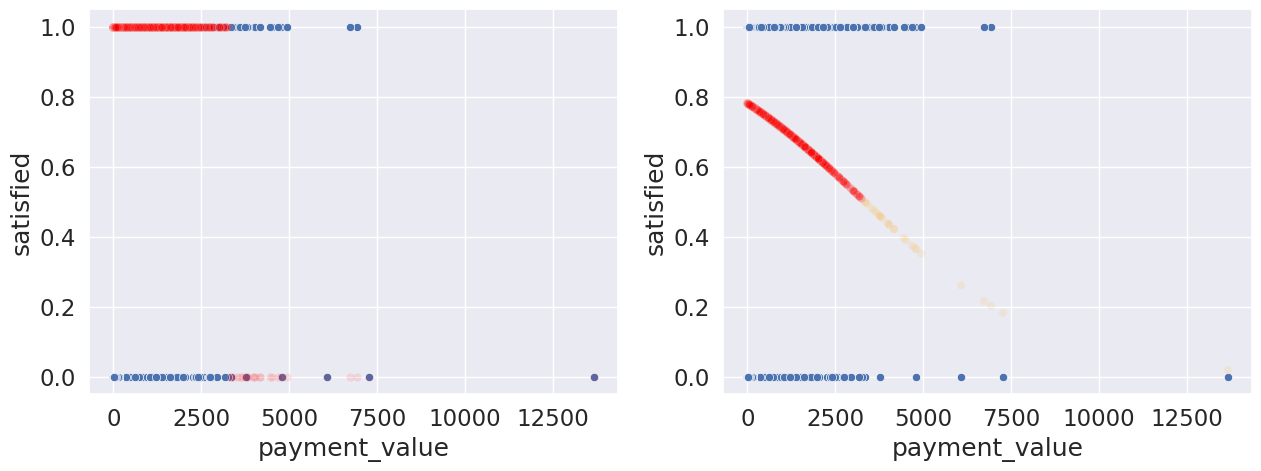


####**Confusion matrix**

The confusion matrix visualization also shows that while the satisfaction of the customers is predicted more accurately, the dissatisfaction is still not predicted with succsess.

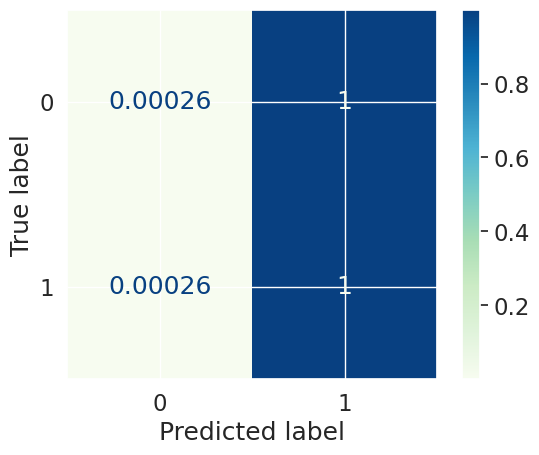

####**Multiple regressions**


 1) Tested key characteristics of order:
* estimation_days = (x['order_estimated_delivery_date'] - x['order_purchase_timestamp']
* product_category
* price
* review_score

As in the previous linear regression, we use just whole review score values in the set from the calculated “avg-review-score” column.
The mean tendency of the data indicates that **the fewer the days from placing te order untill estimated delivery date, the higher the review score is**.
However, we could not identify such a clear tendency regarding product price.

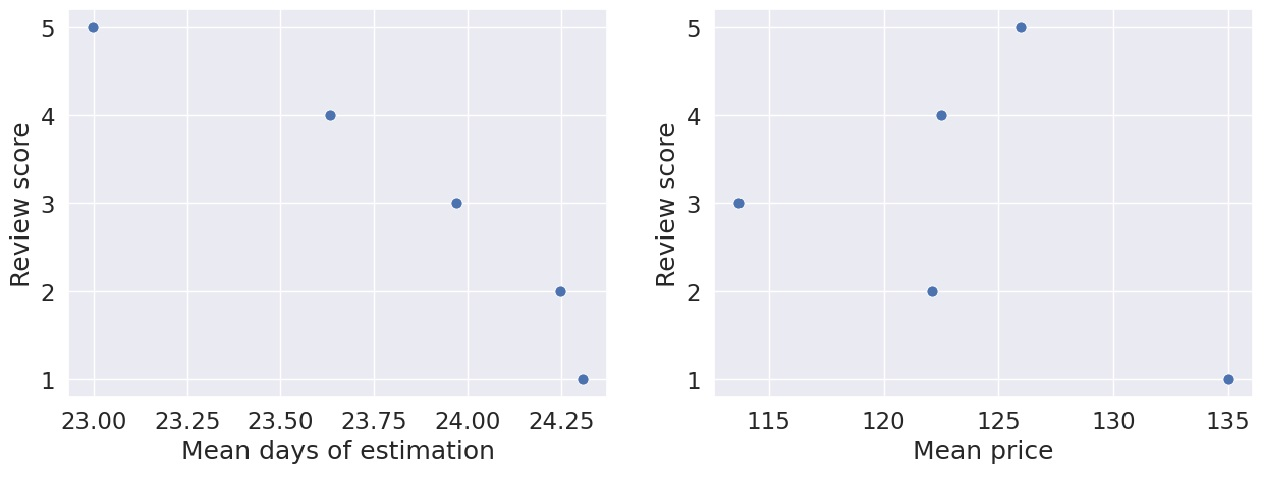

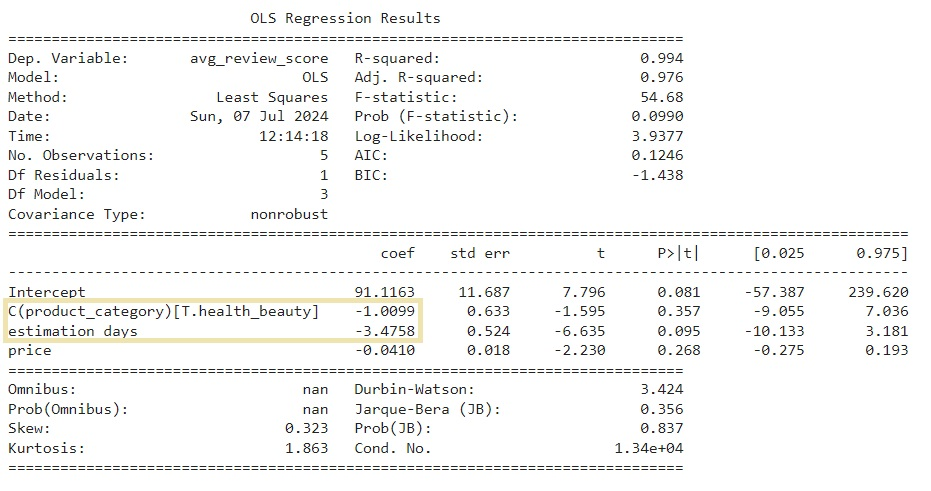

As for the product category the regression shows that the most frequently bought categories are:
*	bed_bath_table
*	health_beauty

**As a result we can say that from the group of these categories, the estimation days and product category are important for the review score, but price not.**

2) Tested key characteristics of order:

* Payment_value

* customer_state

* freight_value

 As in the linear regressions 2 and 3 , we use review_score column and again the payment and freight value. In conclusion, we could not identify a clear tendency regarding those values.

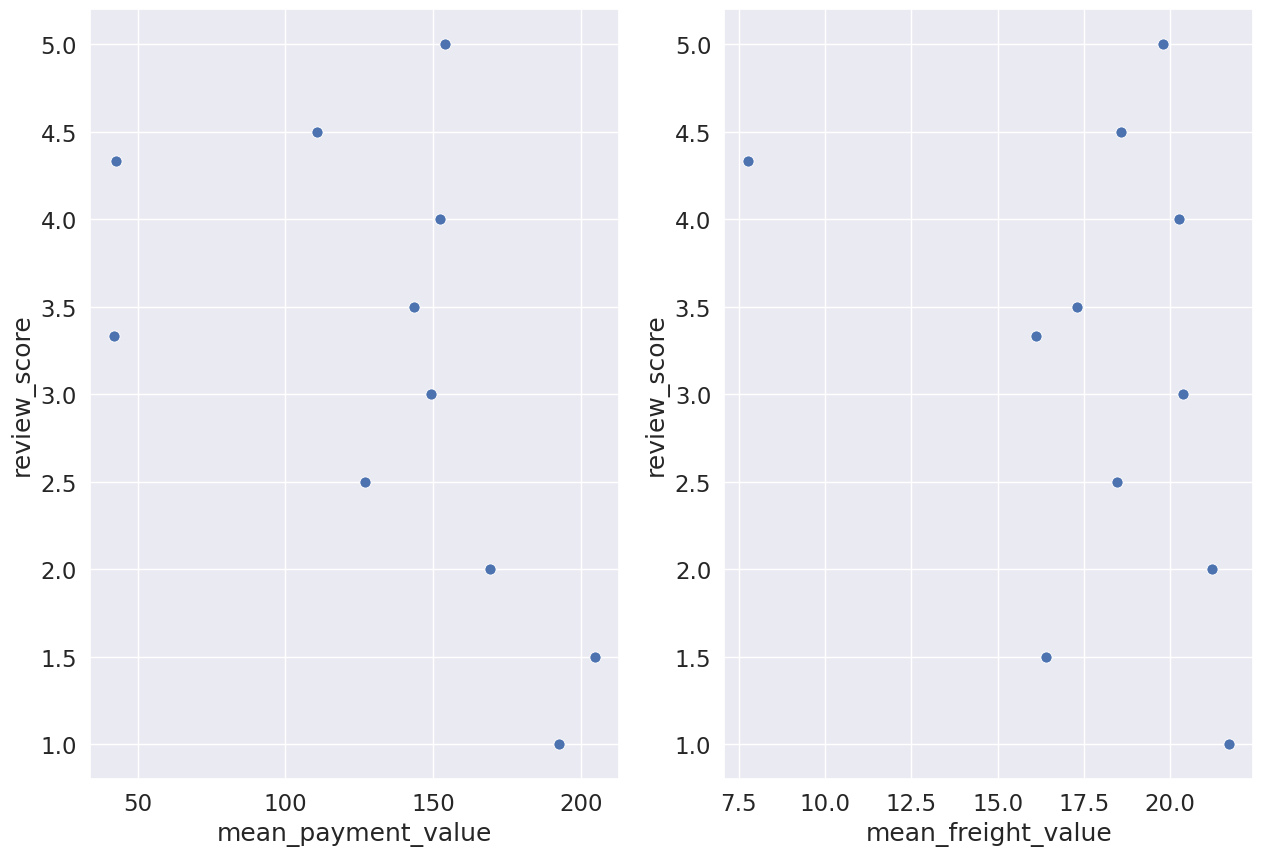

####**Time Series analysis**

to check if there are any interesting period regarding the orders.

The dataset spans a time period between October 2016 and November 2018. As we group the period by month, we see that the first and the last two months have very few orders. For the purposes of time analysis we dropped those and worked with the dataset from Jan 2017 untill Oct 2018.
The resulting charts show a trend for growing number of orders, with a clear and expected peak around New Year holidays.

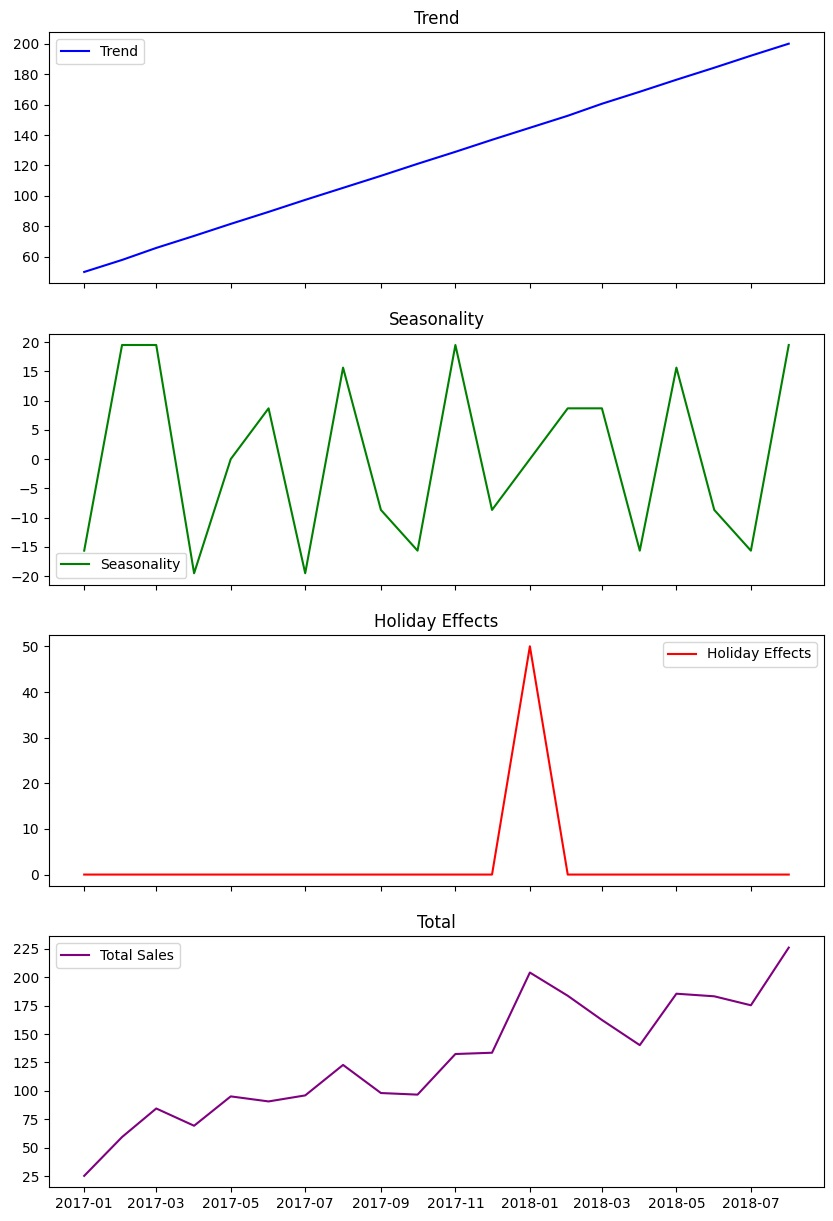

The prediction shows a growing rate of orders in the follwoing 12 months after the dataset timeframe.

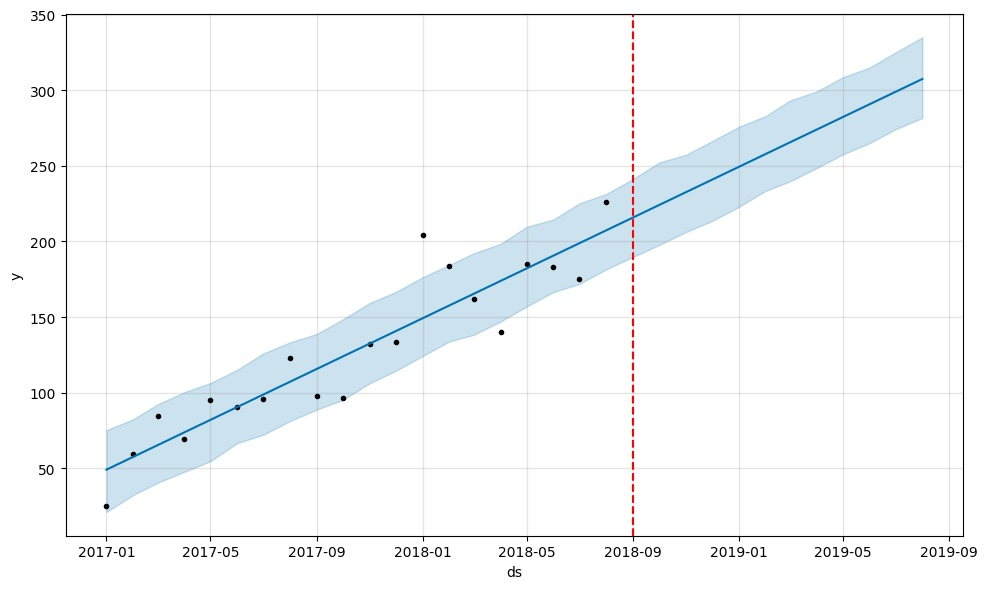

####**Unsupervised machine learning**

Use unsupervised machine learning method to group the orders by their most important characteristics to check if customer review scores are somehow different in some of them.


The main characteristics we focused on in the grouping exercise are:
* the delay of the delivery according to the estimation
* the estimated delivery date for the orders.
In numeric features we took:
* "price"
* "freight_value"
* "product_photos_qty"
* "product_weight_g"
* "product_size_cm"
* "payment_value"

And the cathegorical:
* "customer_city"
* "customer_zip_code_prefix"
* "seller_state"
* "product_category_name_english_full",
* "payment_type"
* "product_category_encoded"

We made 2 grouping sessions:
**late delivery and product size**
**estimated delivery date and total price of the order**



**Grouping with late delivery and product size**

During the processing we use logarithmic values of the product size, however, this results in getting several infinity values. Because they were just a few (15), we proceeded to remove the orders associated with them. Also we dropped all the NaN values.
With KMeans we found the optimal cluster number is 3, so we divided the set in 3 groups.
The resulting density of the groups can be seen in the following graphs.

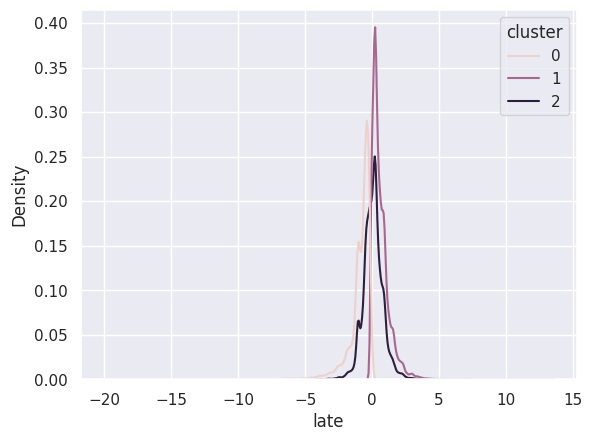

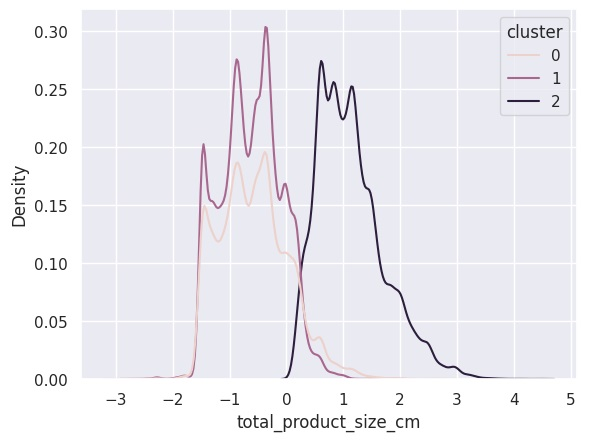

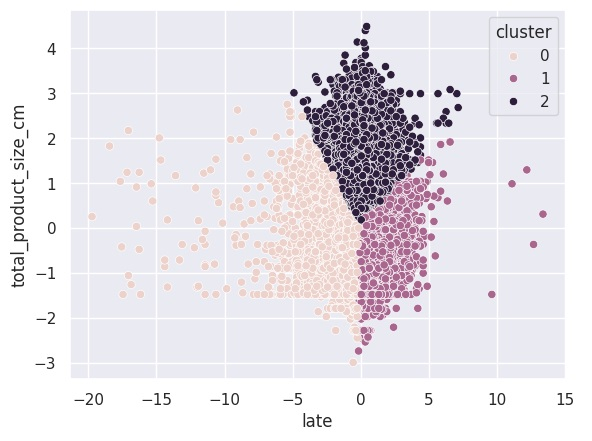

When we try to find the difference of review score in the clusters we have such results:

Cluster   Review

0    3.732617

1    4.362656

2    4.138062

There is no clear specific difference between the groups, even though 'group 0'  has a lower score.

**Grouping with estimation days and total price of the orders**

During the processing we use logarithmic values of the price. We dropped all the NaN values.
With KMeans we found the optimal cluster number is 3, so we divided the set in 3 groups.
We found the density of the groups as shown in the graphs.

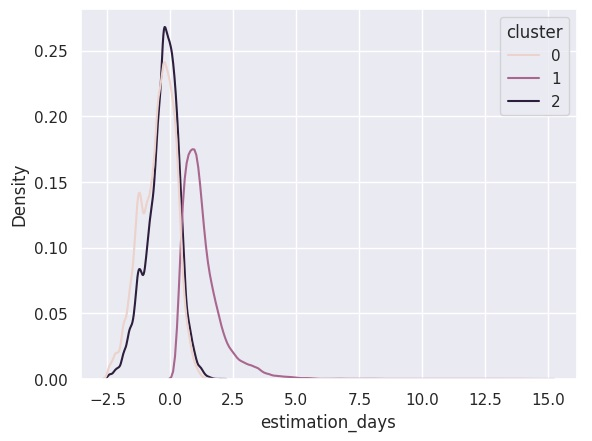

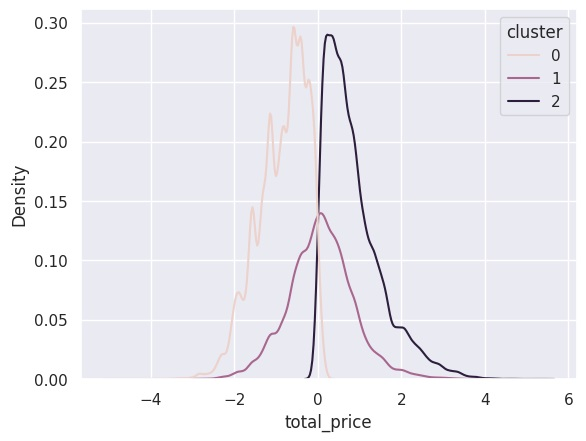

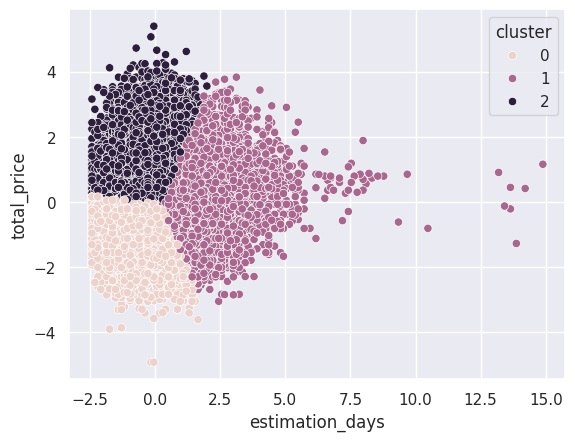

 Checking the difference between review scores in the clusters, the results are:
Cluster   Review

0    4.175601

1    4.039143

2    4.076197

There is no significant difference between the groups.



##**Findings**

**Estimation time by product categories**


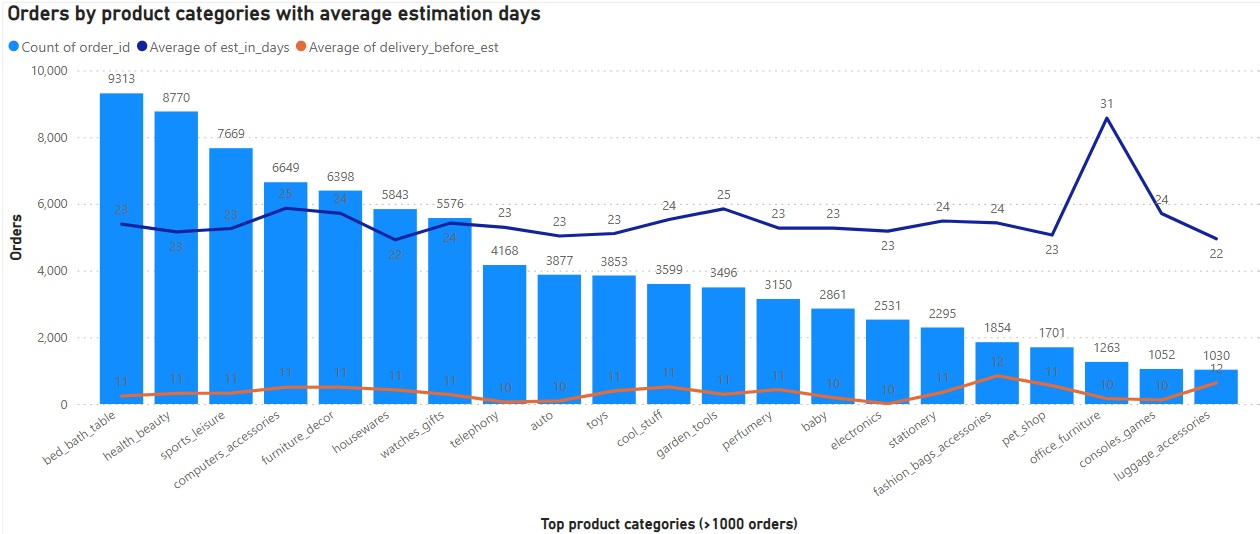

**Estimation time by product weight**

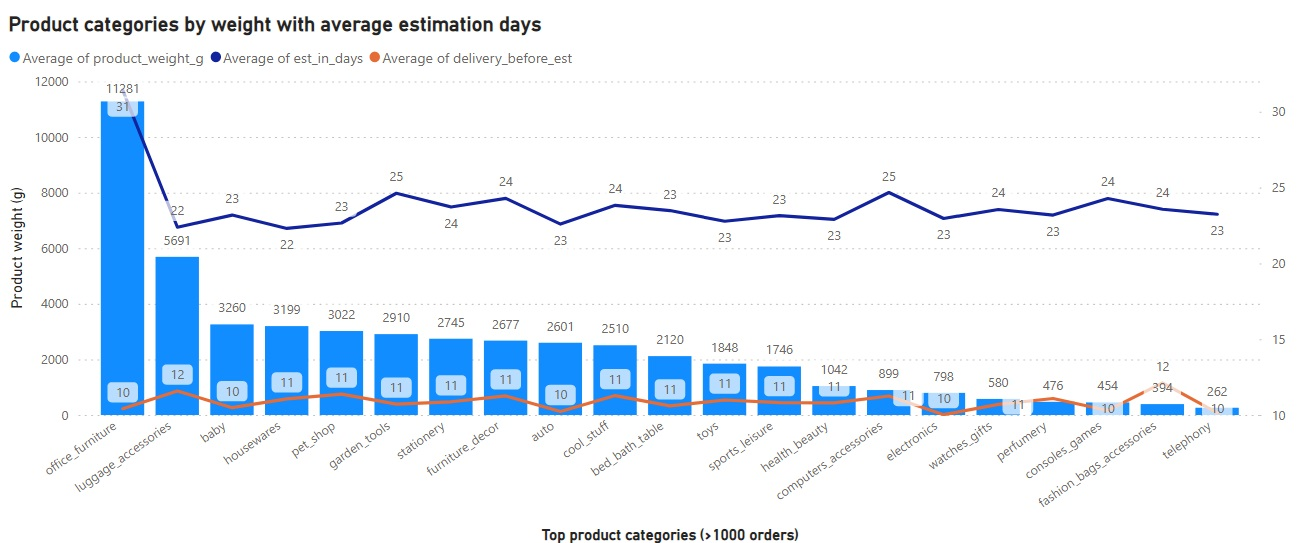

**Order satisfaction by customer state**

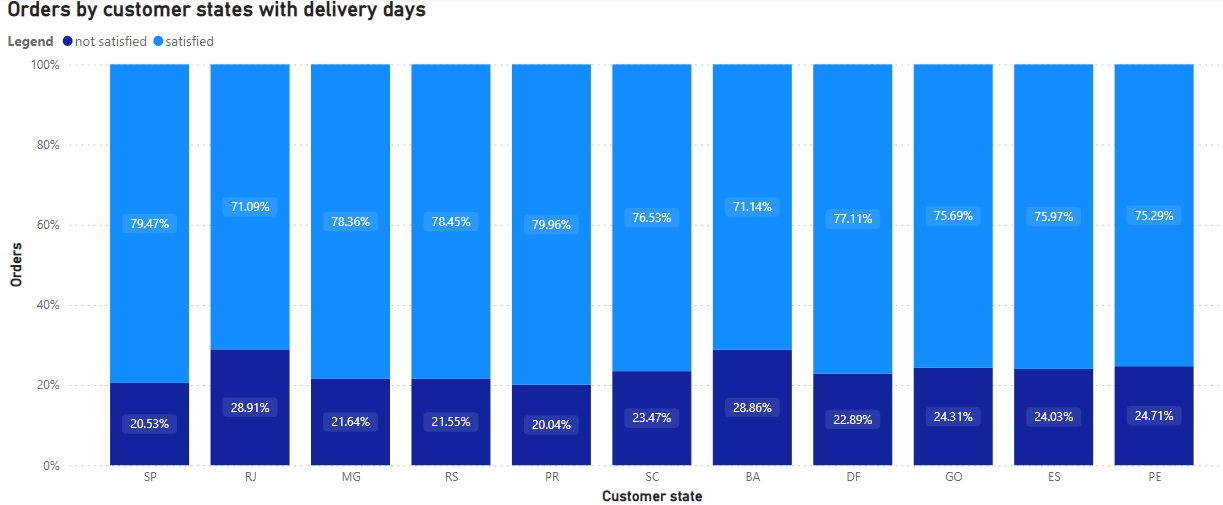

**Delivery days over time (estimated, delivered, carrier days)**

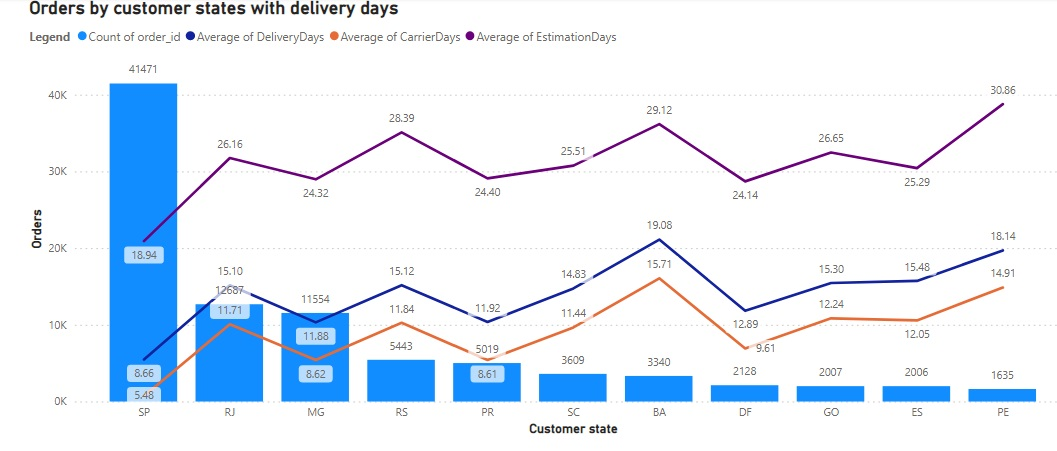

Delivery days over distance (same or different state)((

##**Do your results make sense?**

Our findings, within the scope of the dataset provided, are in line with current research in the field of online customer satisfaction. The main correlations observed agree with common sense and domain-specific knowledge.


##**Can you make any recommendations based on your results?**


* **Improve delivery time estimates**

*It is not clear how the estimates were produced - automatically, manually or a mix of those approaches.*
The calculcation of **estimated time of order delivery to the customer should be more preciese**. We observe a tendency for overestimating delivery days to be quite far off actual delivery to customer (typically fewer days). Given the influece of waiting time on customer review score, all time-sensitive aspects of the olist service should be optimized.
The estimation should take into account the product category (e.g. size, time needed to make the product for craftsmen), location of customer, etc.)

* **Optimize carrier delivery time**

Our analysis showed that from the total days customers wait for their delivery most days are taken by the carrier. In very few cases the seller takes more days to send the carrier than carrier to customer. Delivery time from carrier to customer is influeced by the weight of the order and the geographical location of seller vs. customer. It is advisable to carefully analyse actual delivery times and revise and renegotiate with the carrier to improve delivery times, as well as estimated delivery times.
The dataset shows a clear tendency for inter-state deliveries (different seller and customer states) taking longer to deliver by carrier than same-state deliveries.

* **Review message titles**

**Meaningful and standardized review message titles** can be very helpful for analysing customer stafisfaction drivers. Currently, analysing text messages is difficult, even for AI.

Since dissatisfied customers are far more prone to writing review messages, the texts attachedt to review scores are an indispensible source of direct customer feedback that could be better utilized.

Instead of the current practice of having a free-text, non-mandatory field of 'review_title' (only 13987 review scores have titles), we recommend adding a set of options of predefined titles (e.g. as a drop-down menu) and make this a mandatory field, together with the review score. This will help a more effective and deeper analysis of key factors of customer satisfaction. Providing an 'other' option, where users could define a freestyle title, could help keep the list of predefined categories relevant by collecting user input that would be regulary analysed to help adjust the predefined categories accordingly.